In [1]:
import numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,Dense,ZeroPadding2D
from tensorflow.keras.utils import to_categorical

In [2]:
X_train=mnist.train_images()/255
X_test=mnist.test_images()/255
y_train=mnist.train_labels()
y_test=mnist.test_labels()

In [3]:
np.shape(X_train)

(60000, 28, 28)

In [3]:
X_train=np.expand_dims(X_train,axis=3)

In [4]:
X_test=np.expand_dims(X_test,axis=3)

In [6]:
model=Sequential([
    Conv2D(10,3,input_shape=(28,28,1)),
    MaxPool2D(pool_size=2,strides=2),
    Conv2D(2,3),
    MaxPool2D(pool_size=2,strides=2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 2)         182       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 2)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 128)               6

In [18]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.optimizers import Adam

In [19]:
model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=CategoricalAccuracy())

In [20]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=300)

Epoch 1/10

200/200 [==============================] - 29s 133ms/step - loss: 0.2887 - categorical_accuracy: 0.9165 - val_loss: 0.0670 - val_categorical_accuracy: 0.9793
Epoch 2/10
200/200 [==============================] - 27s 134ms/step - loss: 0.0672 - categorical_accuracy: 0.9801 - val_loss: 0.0453 - val_categorical_accuracy: 0.9846
Epoch 3/10
200/200 [==============================] - 30s 150ms/step - loss: 0.0473 - categorical_accuracy: 0.9854 - val_loss: 0.0365 - val_categorical_accuracy: 0.9878
Epoch 4/10
200/200 [==============================] - 32s 159ms/step - loss: 0.0369 - categorical_accuracy: 0.9886 - val_loss: 0.0315 - val_categorical_accuracy: 0.9892
Epoch 5/10
200/200 [==============================] - 27s 133ms/step - loss: 0.0298 - categorical_accuracy: 0.9909 - val_loss: 0.0309 - val_categorical_accuracy: 0.9891
Epoch 6/10
200/200 [==============================] - 25s 125ms/step - loss: 0.0234 - categorical_accuracy: 0.9927 - val_loss: 0.0316 - val_categorical_ac

In [12]:
import matplotlib.pyplot as plt

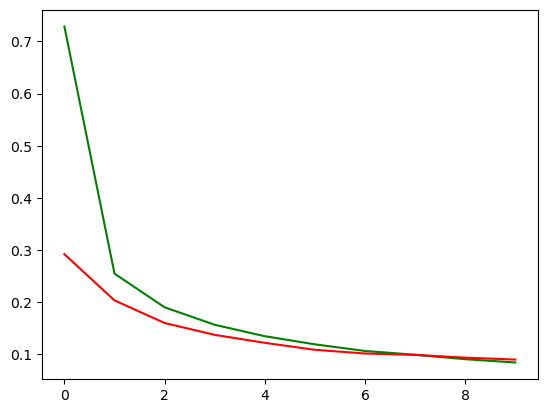

In [14]:
plt.plot(history.history['loss'],color='green',label='Train Data')
plt.plot(history.history['val_loss'],color='red',label='Test Data')

In [29]:
import tensorflow as tf

In [32]:
print(history.history.keys())


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


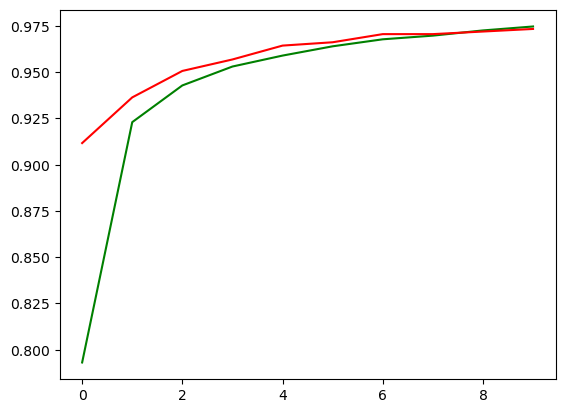

In [33]:
plt.plot(history.history['categorical_accuracy'],color='green',label='Train Data')
plt.plot(history.history['val_categorical_accuracy'],color='red',label='Test Data')

In [16]:
model=Sequential([
    ZeroPadding2D(padding=(1,1),input_shape=(28,28,1)),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [17]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_14 (ZeroPad  (None, 30, 30, 1)         0         
 ding2D)                                                         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 zero_padding2d_15 (ZeroPad  (None, 16, 16, 32)        0         
 ding2D)                                                         
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        18496     
                                                      